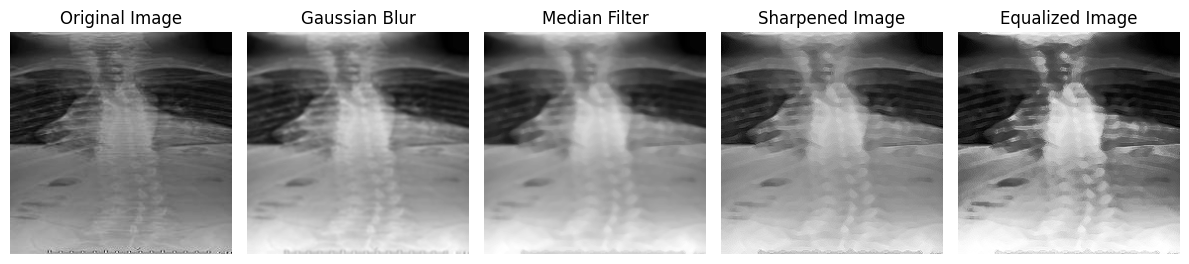

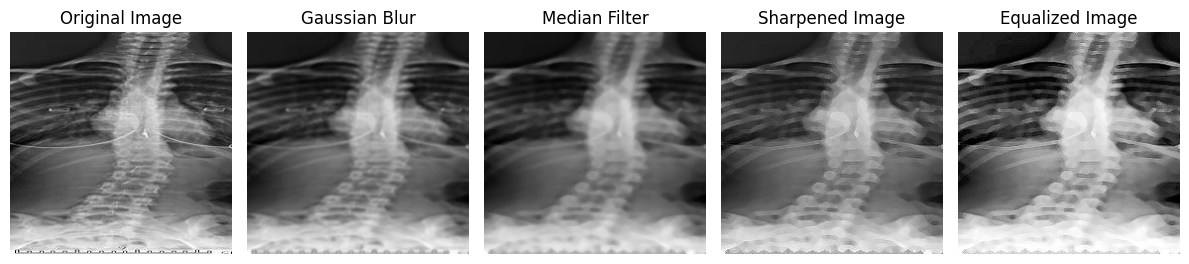

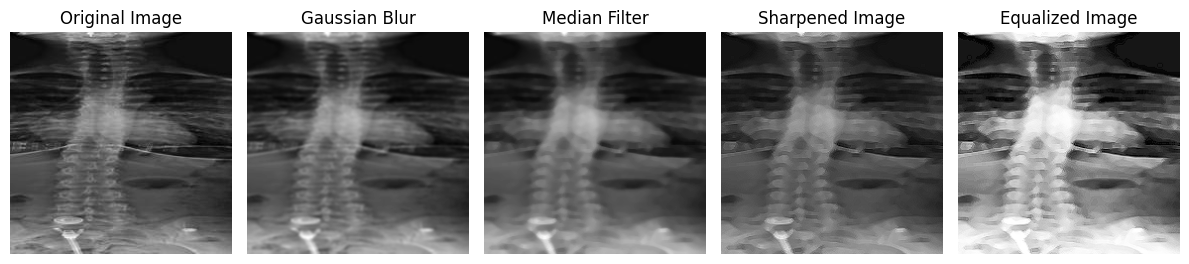

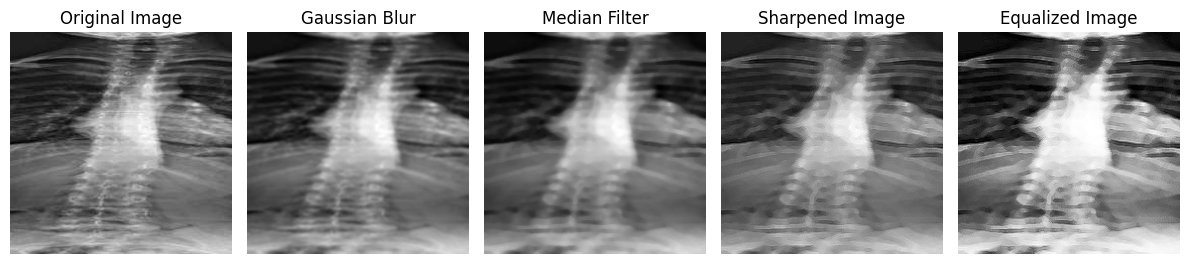

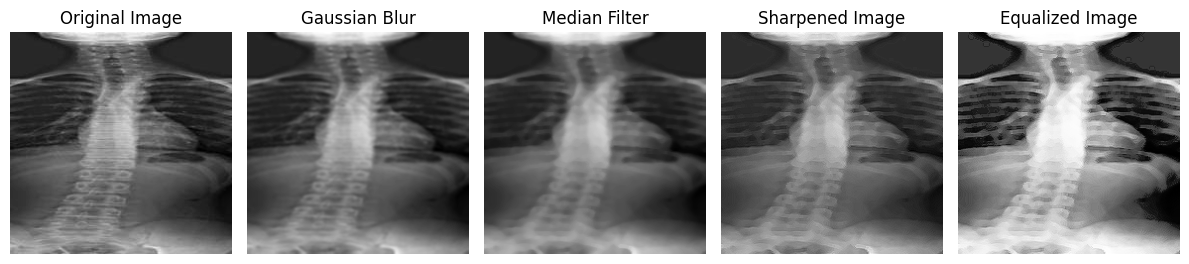

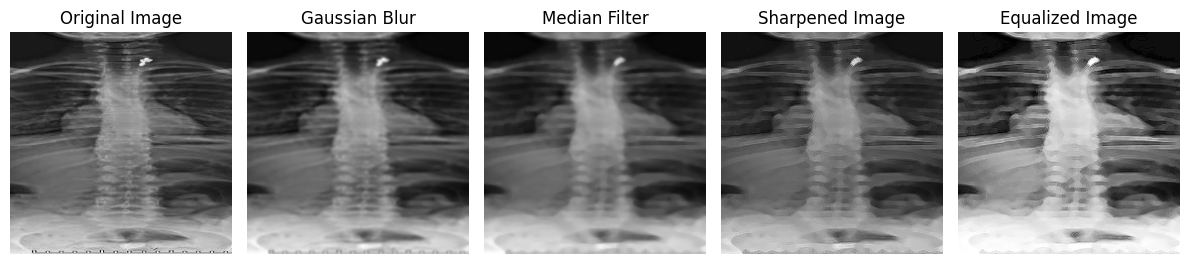

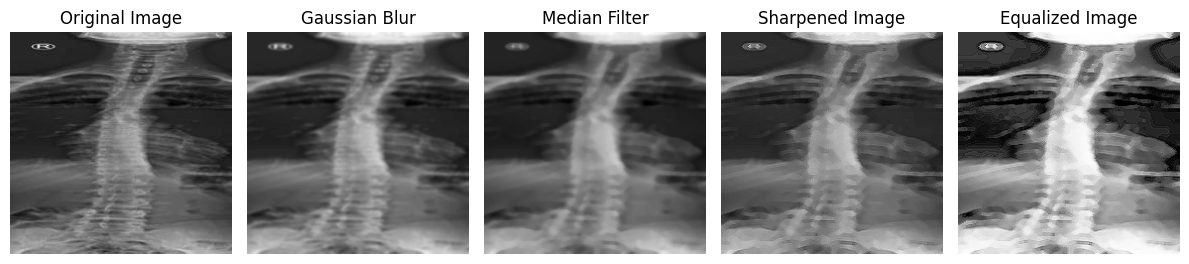

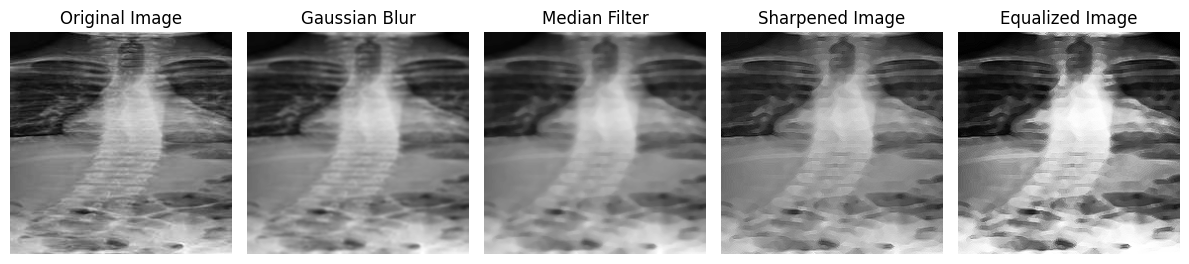

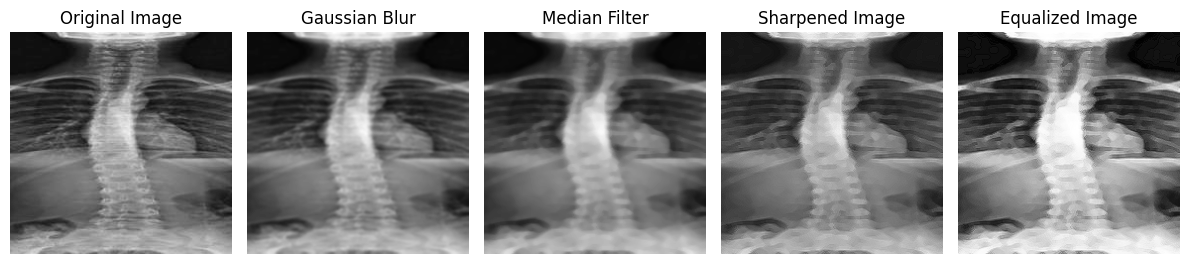

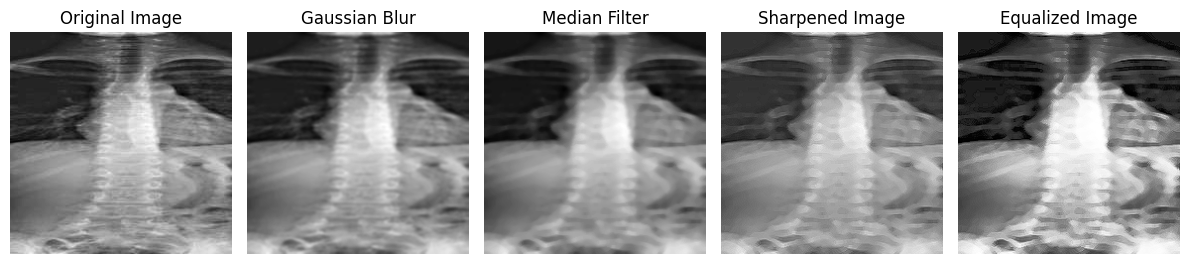

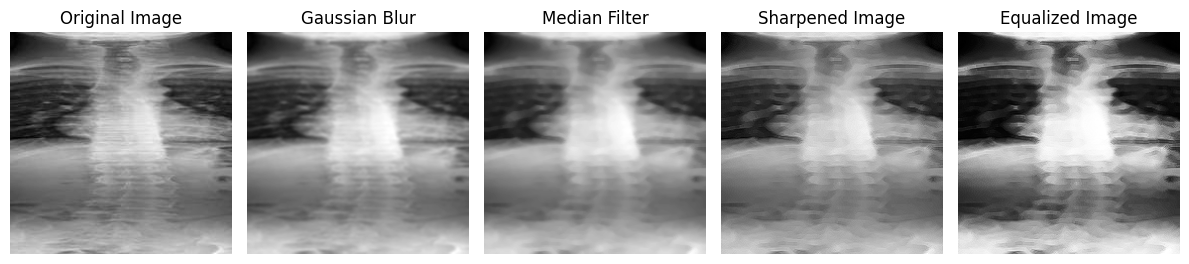

Preprocessing completed and images saved in 'processed_images' folder.


In [3]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import for displaying images

# Define the paths to normal and scoliosis images
normal = '224/Normal'
scoliosis = '224/Scol'
normal_images = os.listdir(normal)
scol_images = os.listdir(scoliosis)

# Create a DataFrame to hold the image paths and labels
df = pd.DataFrame({
    'class': ["NORMAL"] * len(normal_images) + ["SCOLIOSIS"] * len(scol_images),
    'path': [os.path.join(normal, fname) for fname in normal_images] + 
            [os.path.join(scoliosis, fname) for fname in scol_images]
})

# Create a directory to save processed images
output_dir = 'processed_images'
os.makedirs(output_dir, exist_ok=True)

# Function to apply Gaussian Blur
def apply_gaussian_blur(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Function to apply Median Filter
def apply_median_filter(image):
    return cv2.medianBlur(image, 5)

# Function to sharpen an image
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])  # Sharpening kernel
    return cv2.filter2D(image, -1, kernel)

# Function to apply Histogram Equalization
def apply_histogram_equalization(image):
    return cv2.equalizeHist(image)

# Process each image, apply transformations, and save the results
noOfTimes = 0
for idx, row in df.iterrows():
    # Variable noOfTimes helps the code to Print Output for only run for 10 images
    if noOfTimes > 10 :
        break
    noOfTimes = noOfTimes + 1
    # Read image in grayscale
    image = cv2.imread(row['path'], cv2.IMREAD_GRAYSCALE)

    # Display original image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 5, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Apply preprocessing steps
    blurred_image = apply_gaussian_blur(image)
    plt.subplot(1, 5, 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title('Gaussian Blur')
    plt.axis('off')

    filtered_image = apply_median_filter(blurred_image)
    plt.subplot(1, 5, 3)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Median Filter')
    plt.axis('off')

    sharpened_image = sharpen_image(filtered_image)
    plt.subplot(1, 5, 4)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('Sharpened Image')
    plt.axis('off')

    equalized_image = apply_histogram_equalization(sharpened_image)
    plt.subplot(1, 5, 5)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    # Show all processed images
    plt.tight_layout()
    plt.show()
    
    # Save the processed image
    output_path = os.path.join(output_dir, f"{row['class']}_{idx}.png")
    cv2.imwrite(output_path, equalized_image)

print("Preprocessing completed and images saved in 'processed_images' folder.")
